In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import datetime
from sqlalchemy import create_engine

In [14]:
cnx = mysql.connector.connect(user='root', password='password',
                              host='127.0.0.1',
                              database='bitcoin')

In [15]:
cursor = cnx.cursor()
cursor.execute("""SELECT date, sum(value) as value FROM bitcoin.flow where parameter = 30 group by date""")
flow30 = pd.DataFrame(data=list(cursor),columns = cursor.column_names)

cursor2 = cnx.cursor()
cursor2.execute("""SELECT date, sum(value) as value FROM bitcoin.flow where parameter = 7 group by date""")
flow7 = pd.DataFrame(data=list(cursor2),columns = cursor2.column_names)

cursor3 = cnx.cursor()
cursor3.execute("""SELECT date, sum(value) as value FROM bitcoin.flow where parameter = 90 group by date""")
flow90 = pd.DataFrame(data=list(cursor3),columns = cursor3.column_names)

In [16]:
cursor.execute('select * from prices')
prices = pd.DataFrame(data=list(cursor),columns = cursor.column_names)

In [274]:
d1 = "2016-12-31"
d2 = "2024-12-31"
flow30plot = flow30[(flow30["date"] > d1) & (flow30["date"] < d2)]
flow90plot = flow90[(flow90["date"] > d1) & (flow30["date"] < d2)]
flow7plot = flow7[(flow7["date"] > d1) & (flow7["date"] < d2)]
pricesplot = prices[(prices["date"] > datetime.date(2016, 12, 31)) & (prices["date"] < datetime.date(2024, 12, 31))]

In [326]:
flow7plotValues = flow7plot.value.astype(float).values / pricesplot["price"].astype(float).values
flow7plotValuesNormalized = (flow7plotValues-flow7plotValues.mean())/(flow7plotValues.std())

flow30plotValues = flow30plot.value.astype(float).values / pricesplot["price"].astype(float).values
flow30plotValuesNormalized = (flow30plotValues-flow30plotValues.mean())/(flow30plotValues.std())

flow90plotValues = flow90plot.value.astype(float).values / pricesplot["price"].astype(float).values
flow90plotValuesNormalized = (flow90plotValues-flow90plotValues.mean())/(flow90plotValues.std())

diff = (flow30plotValues - flow90plotValues)

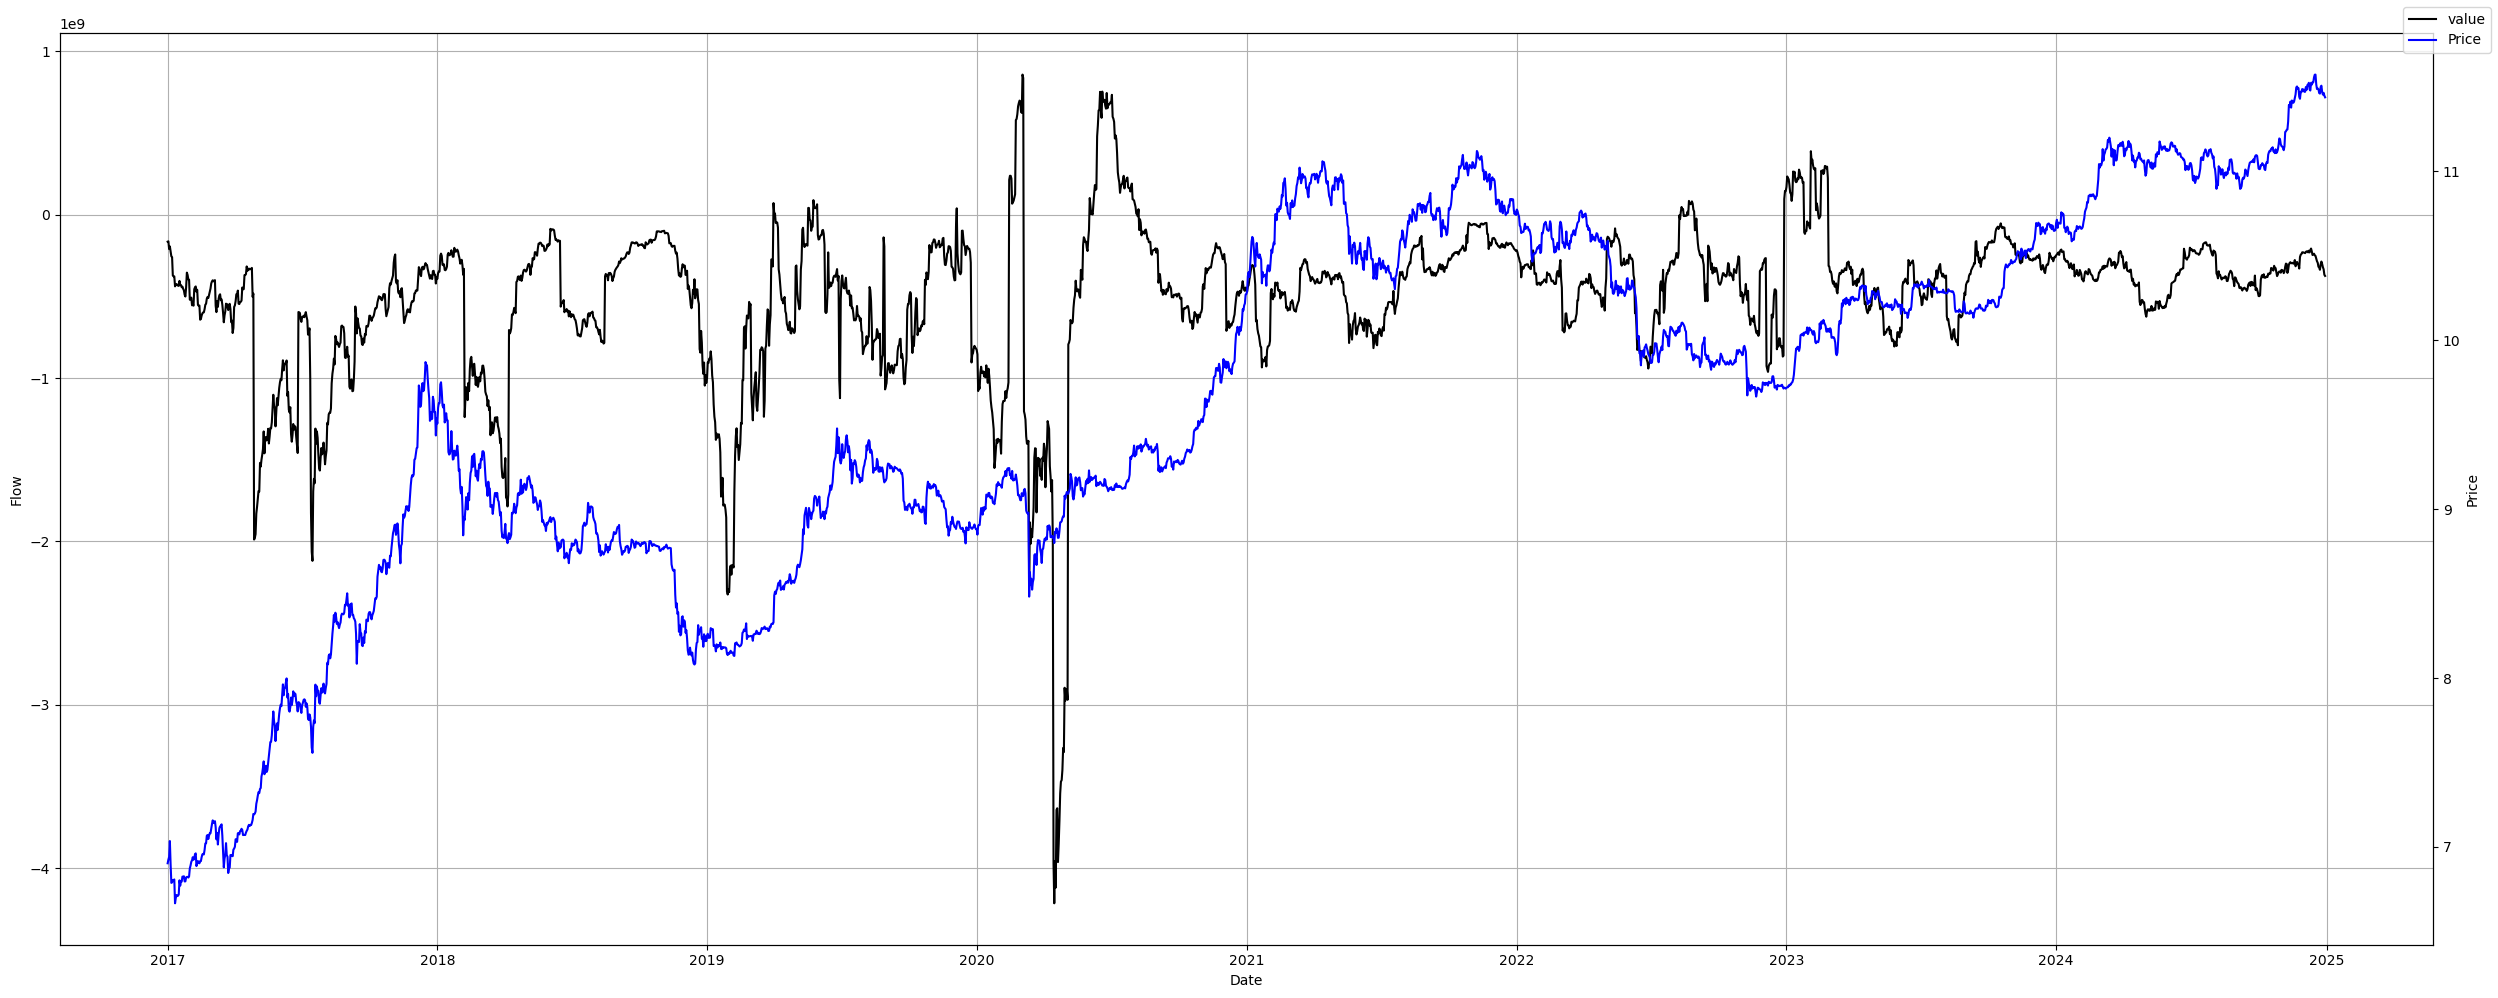

In [ ]:
fig, ax1 = plt.subplots(figsize=(25,10))
ax1.set_xlabel("Date")
ax1.set_ylabel("Flow")
ax1.plot(flow90plot["date"], diff, linestyle="-", color="black", label="value")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Price")
ax2.plot(pricesplot["date"], np.log(pricesplot["price"].astype(float)), linestyle="-", color="b", label="Price")

fig.tight_layout()
fig.legend()
plt.show()

In [325]:
np.corrcoef(diff, np.array(np.log(pricesplot["price"].astype(float))), "full")

array([[1.        , 0.32620857],
       [0.32620857, 1.        ]])